# EDT(EXPLORATORY DATA ANALYSIS)- INDIVIDUAL PROJECT - HENRY MLOPS

### Import needed libraries

In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import missingno as msno


#### Loading dataset from ETL

In [46]:
df=pd.read_csv("Dataset_API/dataset_function_API.csv")## Load dataset from ETL analysis

#### Dataset view

In [17]:
df ## Dataset view

belongs_to_collection      budget  \
0                Toy Story Collection  30000000.0   
1                                 NaN  65000000.0   
2           Grumpy Old Men Collection         0.0   
3                                 NaN  16000000.0   
4      Father of the Bride Collection         0.0   
...                               ...         ...   
45374                             NaN         0.0   
45375                             NaN         0.0   
45376                             NaN         0.0   
45377                             NaN         0.0   
45378                             NaN         0.0   

                                   genres      id original_language  \
0       ['Animation', 'Comedy', 'Family']     862                en   
1      ['Adventure', 'Fantasy', 'Family']    8844                en   
2                   ['Romance', 'Comedy']   15602                en   
3          ['Comedy', 'Drama', 'Romance']   31357                en   
4                              ['Comedy']   11862                en   
...                                   ...     ...               ...   
45374      ['Drama', 'Action', 'Romance']   30840                en   
45375                           ['Drama']  111109                tl   
45376     ['Action', 'Drama', 'Thriller']   67758                en   
45377                                 NaN  227506                en   
45378                                 NaN  461257                en   

                                                overview  popularity  \
0      Led by Woody, Andy's toys live happily in his ...   21.946943   
1      When siblings Judy and Peter discover an encha...   17.015539   
2      A family wedding reignites the ancient feud be...   11.712900   
3      Cheated on, mistreated and stepped on, the wom...    3.859495   
4      Just when George Banks has recovered from his ...    8.387519   
...                                                  ...         ...   
45374  Yet another version of the classic epic, with ...    5.683753   
45375  An artist struggles to finish his work while a...    0.178241   
45376  When one of her hits goes wrong, a professiona...    0.903007   
45377  In a small town live two brothers, one a minis...    0.003503   
45378  50 years after decriminalisation of homosexual...    0.163015   

                                    production_companies  \
0                            ['Pixar Animation Studios']   
1      ['TriStar Pictures', 'Teitler Film', 'Intersco...   
2                     ['Warner Bros.', 'Lancaster Gate']   
3             ['Twentieth Century Fox Film Corporation']   
4       ['Sandollar Productions', 'Touchstone Pictures']   
...                                                  ...   
45374  ['Westdeutscher Rundfunk (WDR)', 'Working Titl...   
45375                                    ['Sine Olivia']   
45376                        ['American World Pictures']   
45377                                      ['Yermoliev']   
45378                                                NaN   

                                    production_countries release_date  \
0                           ['United States of America']   1995-10-30   
1                           ['United States of America']   1995-12-15   
2                           ['United States of America']   1995-12-22   
3                           ['United States of America']   1995-12-22   
4                           ['United States of America']   1995-02-10   
...                                                  ...          ...   
45374  ['Canada', 'Germany', 'United Kingdom', 'Unite...   1991-05-13   
45375                                    ['Philippines']   2011-11-17   
45376                       ['United States of America']   2003-08-01   
45377                                         ['Russia']   1917-10-21   
45378                                 ['United Kingdom']   2017-06-09   

           revenue  runtime  \
0      373554033.0     81.0   
1

#### Non-null count

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45379 entries, 0 to 45378
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4489 non-null   object 
 1   budget                 45379 non-null  float64
 2   genres                 42995 non-null  object 
 3   id                     45379 non-null  int64  
 4   original_language      45368 non-null  object 
 5   overview               44438 non-null  object 
 6   popularity             45379 non-null  float64
 7   production_companies   33583 non-null  object 
 8   production_countries   39168 non-null  object 
 9   release_date           45379 non-null  object 
 10  revenue                45379 non-null  float64
 11  runtime                45133 non-null  float64
 12  spoken_languages       45379 non-null  object 
 13  status                 45298 non-null  object 
 14  tagline                20398 non-null  object 
 15  ti

<AxesSubplot: >

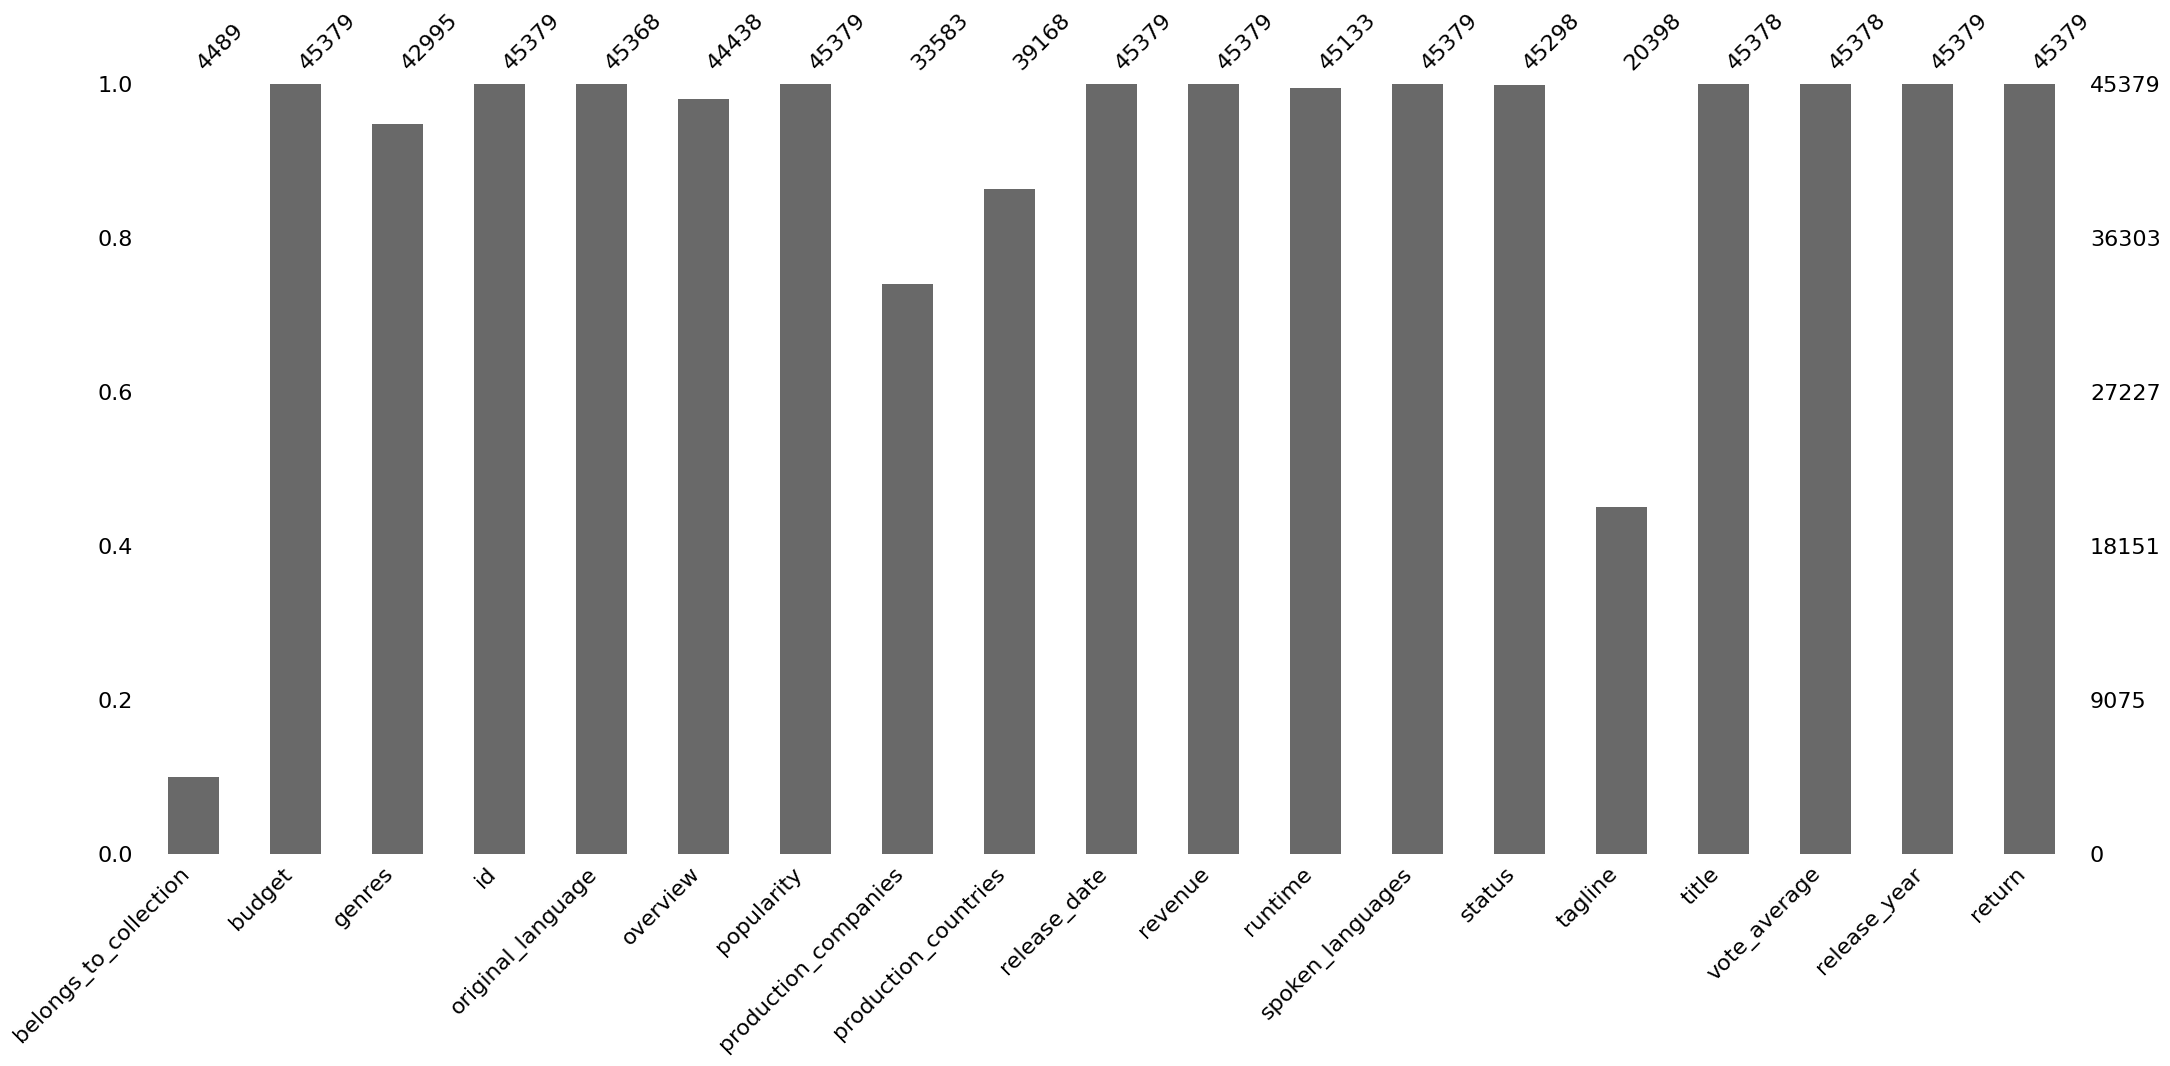

In [4]:
msno.bar(df)

#### Null count

In [19]:
df.isna().sum()

belongs_to_collection    40890
budget                       0
genres                    2384
id                           0
original_language           11
overview                   941
popularity                   0
production_companies     11796
production_countries      6211
release_date                 0
revenue                      0
runtime                    246
spoken_languages             0
status                      81
tagline                  24981
title                        1
vote_average                 1
release_year                 0
return                       0
dtype: int64

<AxesSubplot: >

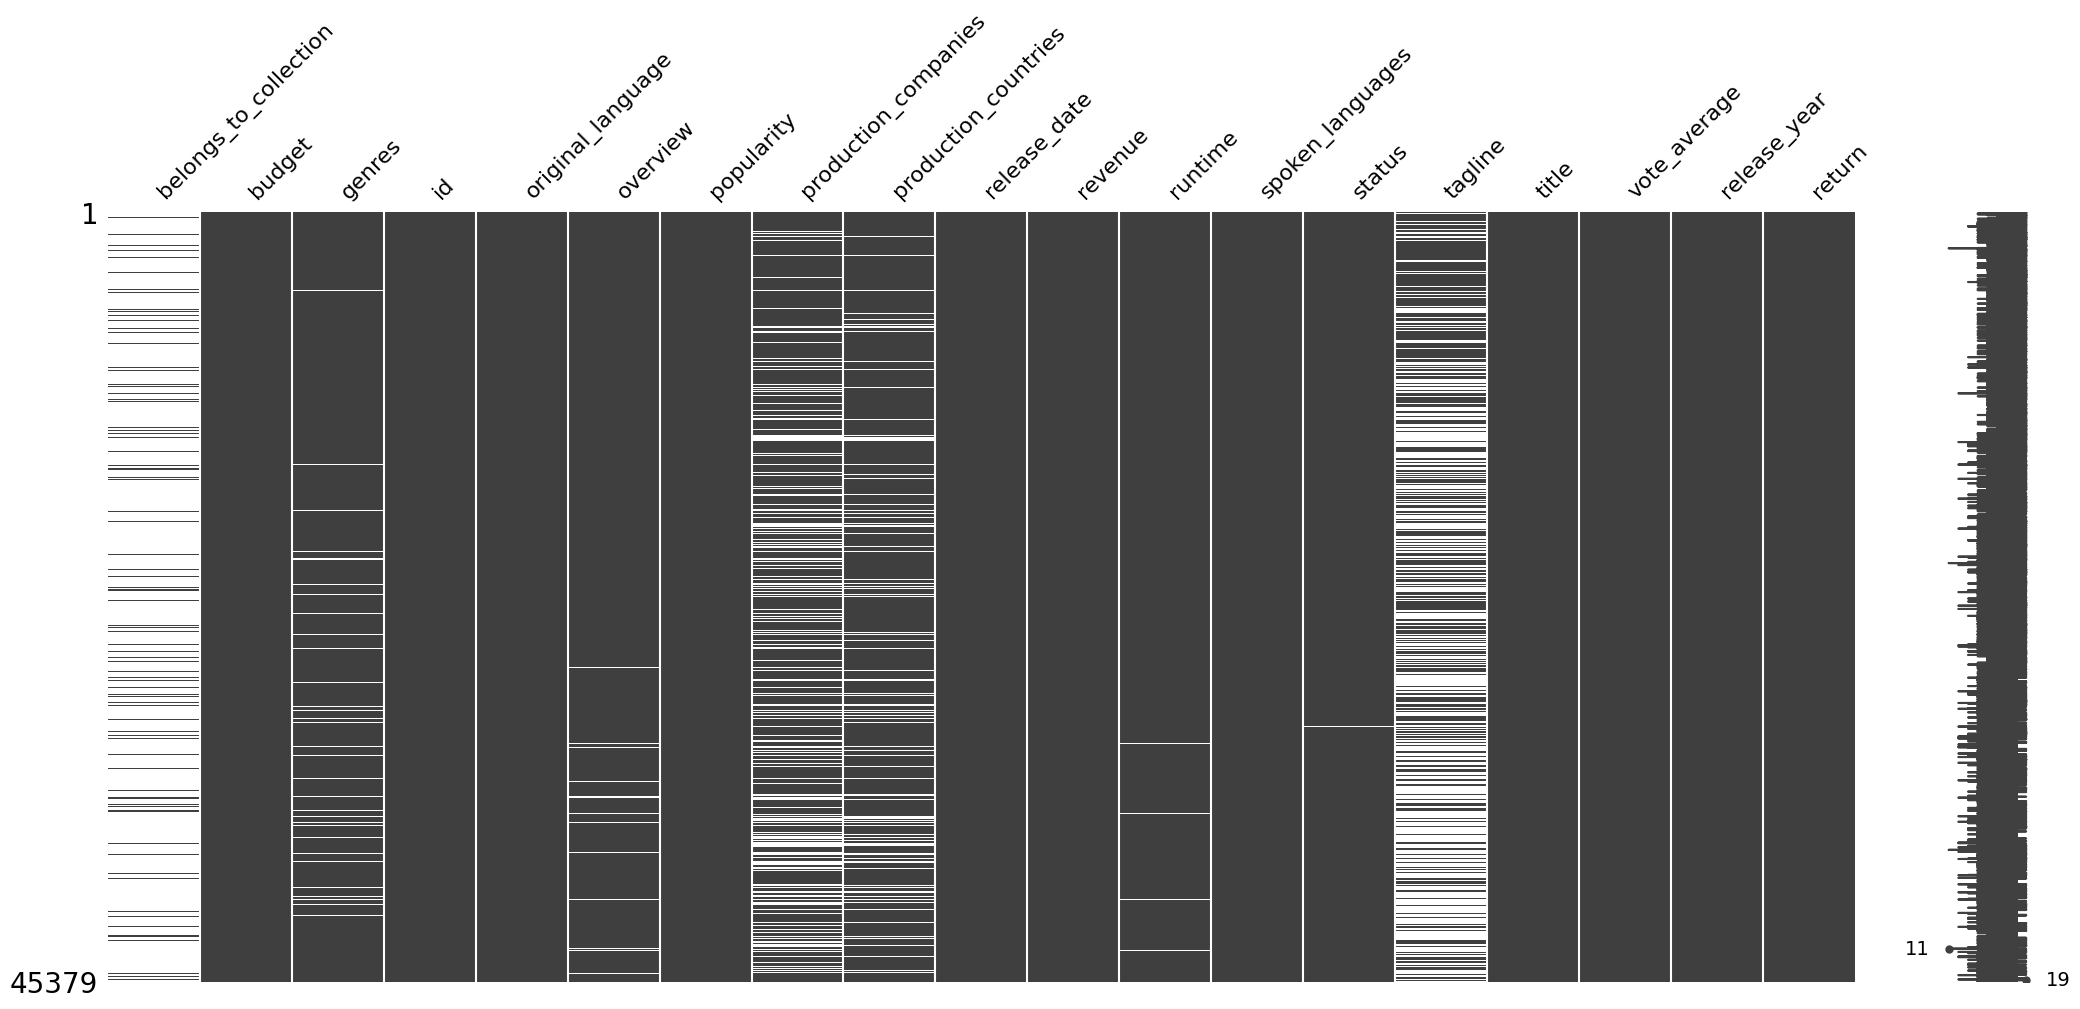

In [5]:
msno.matrix(df)

Exploring what movie is the most popular

Text(0, 0.5, 'movies')

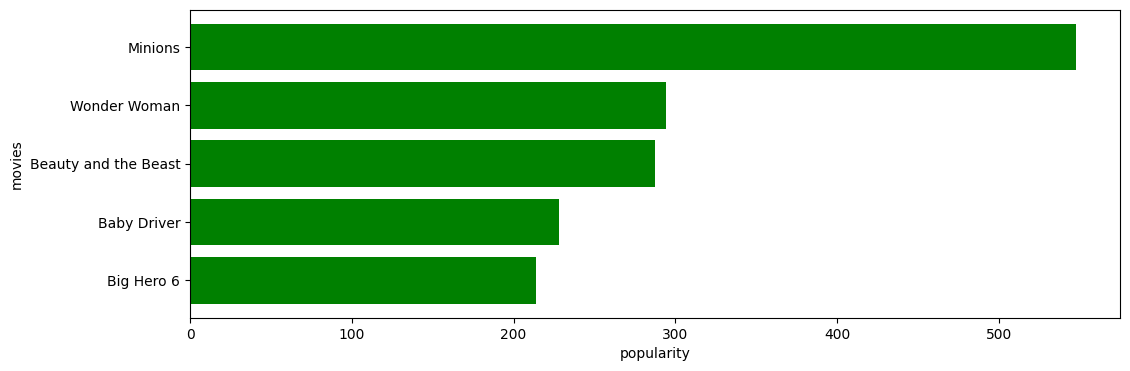

In [3]:
popular=df.sort_values("popularity",ascending=False)##PLOT
plt.figure(figsize=(12,4))
plt.barh(popular.title.head(5),popular.popularity.head(5),align='center',color="green")
plt.gca().invert_yaxis()
plt.xlabel("popularity")
plt.ylabel("movies")



Exploring what collections has more movies.

Text(0, 0.5, 'movies')

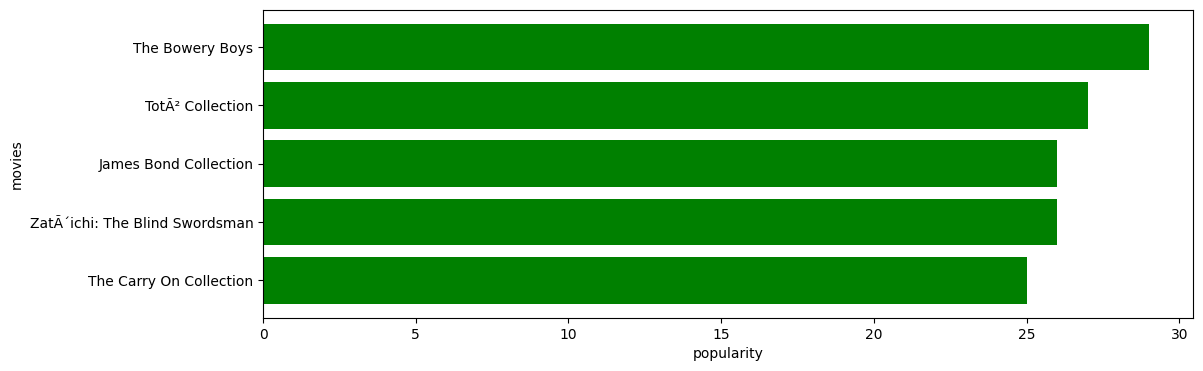

In [24]:
dale=pd.DataFrame(df.belongs_to_collection.value_counts())## PLOT
dale.reset_index(inplace=True)
popular = dale.sort_values("belongs_to_collection", ascending=False)
plt.figure(figsize=(12, 4))
plt.barh(popular["index"].head(5), popular.belongs_to_collection.head(
    5), align='center', color="green")
plt.gca().invert_yaxis()
plt.xlabel("popularity")
plt.ylabel("movies")


### Words cloud

In [48]:
dft=pd.read_csv("Dataset_ML/Dataset_ML_function.csv")
texto = ""
for i in range(dft.shape[0]):
    texto = texto+" "+dft.title.iloc[i]## Concat titles 
quitar = ",;:.\n!\"'"
for caracter in quitar:
    texto = texto.replace(caracter,
                          "")## replace symbols by blank space
texto = texto.lower()
palabras = texto.split(" ")## Separate words by spaces

diccionario_frecuencias = {}
for palabra in palabras:## Create a dictionary with the count of the words
    if palabra in diccionario_frecuencias:
        diccionario_frecuencias[palabra] += 1
    else:
        diccionario_frecuencias[palabra] = 1


In [ ]:
frecuencia=pd.DataFrame(data=diccionario_frecuencias, index=[0] )## Convert the dictionary to a dataframe
frecuencia=frecuencia.transpose()
frecuencia.reset_index(inplace=True)
frecuencia=frecuencia.sort_values(by=[0],ascending=False)

In [49]:
frecuencia

index      0
12            the  12810
11             of   4500
120             a   2016
112            in   1520
19            and   1436
...           ...    ...
11518       moody      1
11519    kalamity      1
11520  four-faced      1
11521      mattei      1
22246    birthing      1

[22247 rows x 2 columns]

Text(0, 0.5, 'Words in titles')

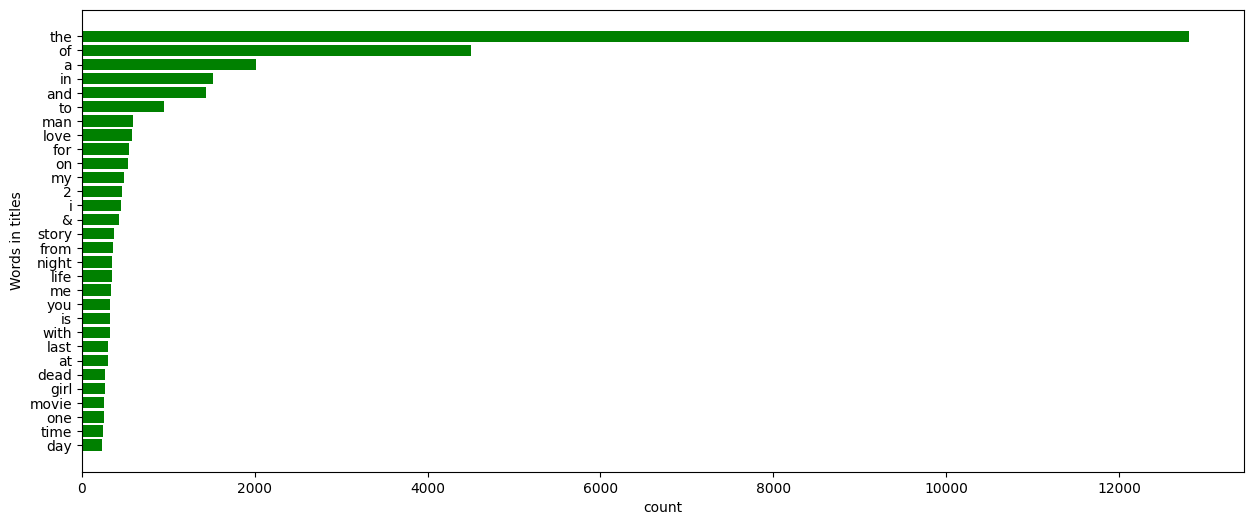

In [52]:

plt.figure(figsize=(15, 6))
plt.barh(frecuencia["index"].head(30), frecuencia[0].head(
    30), align='center', color="green")
plt.gca().invert_yaxis()
plt.xlabel("count")
plt.ylabel("Words in titles")


#### Making an EDA report by PANDAS_PROFILING, Profile report

In [37]:
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)### Making a report
profile.to_file("output.html")  # Exporting the report to a file
profile  # Display the report


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### SUMMARY OF THE ANALYSIS CARRIED OUT BY DATA PROFILING 

<ol>
<li>genres has 2384 (5.3%) missing values</li>
<li>belongs_to_collection has 40890 (90.1%) missing values</li>
<li>overview has 941 (2.1%) missing valuess</li>
<li>belongs_to_collection has 40890 (90.1%) missing values</li>
<li>title is uniformly distributed</li>
</ol>

### MACHINE LEARNING MODEL 

#### Based on the next 2 research articles, features for ML model will be chosen

Efficient Features for Movie Recommendation Systems, Master’s Degree Project Stockholm, Sweden October 2014 By SUVIR BHARGAV


<img src="src/EDA1.png">

Feature selection for movie recommendation, Turkish Journal of Electrical Engineering & Computer Sciences, 2016 By Zehra C¸ ATALTEPE1, Mahiye ULUYA GMUR, Esengul TAYFUR

<img src="src/EDA2.png">

##### Genre and overview are chosen due to dataset does not show another feature mentioned in the research articles, also collections could be used but due to lack of information about it(90.1% missing values), this is discarded

In [32]:
df1=df[["title","genres","overview","popularity"]]## Getting dataset with only needed columns

In [28]:
df1## Dataset view

title                              genres  \
0                        Toy Story   ['Animation', 'Comedy', 'Family']   
1                          Jumanji  ['Adventure', 'Fantasy', 'Family']   
2                 Grumpier Old Men               ['Romance', 'Comedy']   
3                Waiting to Exhale      ['Comedy', 'Drama', 'Romance']   
4      Father of the Bride Part II                          ['Comedy']   
...                            ...                                 ...   
45374                   Robin Hood      ['Drama', 'Action', 'Romance']   
45375          Century of Birthing                           ['Drama']   
45376                     Betrayal     ['Action', 'Drama', 'Thriller']   
45377             Satan Triumphant                                 NaN   
45378                     Queerama                                 NaN   

                                                overview  popularity  \
0      Led by Woody, Andy's toys live happily in his ...   21.946943   
1      When siblings Judy and Peter discover an encha...   17.015539   
2      A family wedding reignites the ancient feud be...   11.712900   
3      Cheated on, mistreated and stepped on, the wom...    3.859495   
4      Just when George Banks has recovered from his ...    8.387519   
...                                                  ...         ...   
45374  Yet another version of the classic epic, with ...    5.683753   
45375  An artist struggles to finish his work while a...    0.178241   
45376  When one of her hits goes wrong, a professiona...    0.903007   
45377  In a small town live two brothers, one a minis...    0.003503   
45378  50 years after decriminalisation of homosexual...    0.163015   

                belongs_to_collection  
0                Toy Story Collection  
1                                 NaN  
2           Grumpy Old Men Collection  
3                                 NaN  
4      Father of the Bride Collection  
...                               ...  
45374                             NaN  
45375                             NaN  
45376                             NaN  
45377                             NaN  
45378                             NaN  

[45379 rows x 5 columns]

In [38]:
profile1 = ProfileReport(df1, title='Pandas Profiling Report',
                        explorative=True)  # Making a report
profile1.to_file("output_ML.html")  # Exporting the report to a file
profile1  # Display the report


C:\Users\angeo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas_profiling\utils\dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### SUMMARY OF THE ANALYSIS CARRIED OUT BY DATA PROFILING 

<ol>
<li>Dataset has 31 (0.1%) duplicate rows</li>
<li>title has a high cardinality: 42195 distinct values(93%)</li>
<li>genres has 2384 (5.3%) missing values</li>
<li>overview has 941 (2.1%) missing values</li>
</ol>

Dataset clean

In [ ]:
df1.drop_duplicates(inplace=True)## Remove duplicate rows
df1.drop_duplicates(subset=["title"],inplace=True)## Remove rows where movies has same name for avoiding same name recomendations
df1.dropna(subset=["genres","overview","title","popularity"],inplace=True)## Remove rows with any empty information
df1.reset_index(drop=True,inplace=True)## Reset

In [30]:
df1 ##Dataset cleaned view

title                              genres  \
0                        Toy Story   ['Animation', 'Comedy', 'Family']   
1                          Jumanji  ['Adventure', 'Fantasy', 'Family']   
2                 Grumpier Old Men               ['Romance', 'Comedy']   
3                Waiting to Exhale      ['Comedy', 'Drama', 'Romance']   
4      Father of the Bride Part II                          ['Comedy']   
...                            ...                                 ...   
39304             House of Horrors   ['Horror', 'Mystery', 'Thriller']   
39305    Shadow of the Blair Witch               ['Mystery', 'Horror']   
39306          The Burkittsville 7                          ['Horror']   
39307              Caged Heat 3000                 ['Science Fiction']   
39308          Century of Birthing                           ['Drama']   

                                                overview  popularity  \
0      Led by Woody, Andy's toys live happily in his ...   21.946943   
1      When siblings Judy and Peter discover an encha...   17.015539   
2      A family wedding reignites the ancient feud be...   11.712900   
3      Cheated on, mistreated and stepped on, the wom...    3.859495   
4      Just when George Banks has recovered from his ...    8.387519   
...                                                  ...         ...   
39304  An unsuccessful sculptor saves a madman named ...    0.222814   
39305  In this true-crime documentary, we delve into ...    0.076061   
39306  A film archivist revisits the story of Rustin ...    0.386450   
39307  It's the year 3000 AD. The world's most danger...    0.661558   
39308  An artist struggles to finish his work while a...    0.178241   

                belongs_to_collection  
0                Toy Story Collection  
1                                 NaN  
2           Grumpy Old Men Collection  
3                                 NaN  
4      Father of the Bride Collection  
...                               ...  
39304                             NaN  
39305                             NaN  
39306                             NaN  
39307                             NaN  
39308                             NaN  

[39309 rows x 5 columns]

In [18]:
df1.isna().sum()## Cleaned Dataset

title         0
genres        0
overview      0
popularity    0
dtype: int64

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39331 entries, 0 to 39330
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       39331 non-null  object 
 1   genres      39331 non-null  object 
 2   overview    39331 non-null  object 
 3   popularity  39331 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


Exporting dataset after EDA

In [31]:
df1.to_csv("Dataset_ML/Dataset_ML_function.csv",index=False)